<a href="https://colab.research.google.com/github/byiringiroscar/NLP_FELLOWSHIP/blob/main/pytorch_documentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import numpy as np

#create 1d torch

In [2]:
x = torch.empty(1) 

#create 2d torch

In [3]:
x = torch.empty(2, 3)
x

tensor([[2.6399e-34, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00]])

#create 3d torch 

In [4]:
x = torch.empty(3, 3, 3)
x

tensor([[[2.6267e-34, 0.0000e+00, 1.3452e-43],
         [0.0000e+00,        nan, 0.0000e+00],
         [2.8937e+12, 7.5338e+28, 7.2053e+22]],

        [[4.7428e+30, 6.9983e+28, 1.2412e+28],
         [1.0304e+21, 2.7495e+26, 5.6502e-02],
         [1.8728e+31, 7.3867e+20, 2.0027e-19]],

        [[7.8026e+34, 1.0894e+27, 1.4603e-19],
         [1.6795e+08, 4.7423e+30, 4.7393e+30],
         [9.5461e-01, 4.4377e+27, 1.7975e+19]]])

#create empty zeros and ones

In [5]:
x = torch.zeros(2, 2) # 2d dimension
x

tensor([[0., 0.],
        [0., 0.]])

In [6]:
x = torch.zeros(2, 2, dtype=torch.int) # change dataype
x

tensor([[0, 0],
        [0, 0]], dtype=torch.int32)

#create your tensor 

In [7]:
x = torch.tensor([2.5, 0.1, 2.3]) # create 1d tensor
x

tensor([2.5000, 0.1000, 2.3000])

# let's see randon with torch , add, sub, div , mul

In [8]:
x = torch.rand(2,2)
y = torch.rand(2,2)
x

tensor([[0.5344, 0.1321],
        [0.7449, 0.8101]])

In [9]:
z = x + y
z = torch.add(x, y)

inplace addition


In [10]:
y.add_(x) # inplace will modifie y variable add with x
y

tensor([[1.4020, 0.7452],
        [1.2641, 1.1572]])

In [11]:
z = torch.sub(x, y)
z = x-y
z = torch.mul(x, y)
z = x*y
z = torch.div(x, y)
z=x/y

#create random with 2d dimension then do slicing

In [12]:
# remember rows go vertical | and column go horizontal __  and(rows, column)
x = torch.rand(5, 3)
print(x)
print(x[:, 1]) # this will print all rows in column 1
print(x[1,:]) # this will print rows 1 and all column  

tensor([[0.0259, 0.6742, 0.0214],
        [0.2782, 0.1772, 0.2408],
        [0.9150, 0.5677, 0.5273],
        [0.8689, 0.6984, 0.9929],
        [0.8079, 0.6190, 0.8232]])
tensor([0.6742, 0.1772, 0.5677, 0.6984, 0.6190])
tensor([0.2782, 0.1772, 0.2408])


In [13]:
print(x[1,1])
print(x[1,1].item()) # print actual element 

tensor(0.1772)
0.1772347092628479


#reshape tensor

In [14]:
x = torch.rand(4,4)
y = x.view(16) #  4*4 = 16
print(y) # will be in 1d

tensor([0.0782, 0.0130, 0.4265, 0.5484, 0.3162, 0.3553, 0.2697, 0.1746, 0.7010,
        0.4996, 0.9671, 0.9204, 0.5721, 0.1027, 0.2094, 0.4598])


In [15]:
y = x.view(-1, 8) # this will take 2d with 8,8

#convert tensor to numpy

In [16]:
a = torch.ones(5)
a

tensor([1., 1., 1., 1., 1.])

In [17]:
b = a.numpy()
print(type(b)) # convert a tensor to numpy array

<class 'numpy.ndarray'>


N:B when we tensor are running on cpu not on gpu will share same memory then effect from one it will effect others
because they are sharing same memory location

In [18]:

a
a.add_(1)

tensor([2., 2., 2., 2., 2.])

In [19]:
b

array([2., 2., 2., 2., 2.], dtype=float32)

In [20]:
a = np.ones(5)
a

array([1., 1., 1., 1., 1.])

In [21]:
b = torch.from_numpy(a) # by default it will have datatype torch.float64

In [22]:
a += 1

In [23]:
a

array([2., 2., 2., 2., 2.])

In [24]:
b

tensor([2., 2., 2., 2., 2.], dtype=torch.float64)

#if we are running on cuda toolkit

In [25]:
# we can check it by this
if torch.cuda.is_available():
  device = torch.device("cuda") # when you are on window and you have cuda available
  #create tensor on gpu
  x = torch.ones(5, device=device) # this will create tensor then put on gpu
  # or we can do like this
  y = torch.ones(5)
  y = y.to(device=device) # and it will be much fast
  z = x +y
  #z.numpy() # this will return error because numpy handle cpu tensor we have to move it back to cpu
  z = z.to("cpu")
else:
  print("no")

no


In [26]:
x = torch.ones(5, requires_grad=True) # this will pytorch that we will be using gradient in optimization later
x

tensor([1., 1., 1., 1., 1.], requires_grad=True)

#autograd package
this will help us in our model optimization

In [27]:
x = torch.randn(3, requires_grad=True)
print(x)
y = x +2 # here our input is x and 2  
print(y)

tensor([-0.6557,  0.4495,  0.0239], requires_grad=True)
tensor([1.3443, 2.4495, 2.0239], grad_fn=<AddBackward0>)


grad can be implicitly created only for scalar outputs solve this error by creating torch with same dimension then pass it in backward

In [28]:
z = y*y*2
#z = z.mean()
v = torch.tensor([0.1, 1.0, 0.001], dtype=torch.float32)
z

tensor([ 3.6142, 11.9999,  8.1921], grad_fn=<MulBackward0>)

calculate gradient

In [29]:
#z.backward() # calculate gradient # dz/dx
#print(x.grad)
z.backward(v)
print(x.grad)

tensor([5.3772e-01, 9.7979e+00, 8.0955e-03])


# prevent pytorch to track our history so we have 3 option to solve it


1.   x.requires_grad_(False)
2.   x.detach()
3.   with torch.no_grad():






In [30]:
x = torch.randn(3, requires_grad=True)
x

tensor([ 0.5945, -0.4207, -0.0307], requires_grad=True)

option 1

In [31]:
x.requires_grad_(False)
x

tensor([ 0.5945, -0.4207, -0.0307])

option 2

In [32]:
y = x.detach()
y

tensor([ 0.5945, -0.4207, -0.0307])

option 3

In [33]:
with torch.no_grad():
  y = x+2
  print(y)

tensor([2.5945, 1.5793, 1.9693])


In [ ]:
weights = torch.ones(4, requires_grad=True)
print(weights)


for epoch in range(3):
  print("weights *****************", weights)
  model_output = (weights*3).sum()
  print("model_output *****************", model_output)
  model_output.backward()
  print(weights.grad)
  weights.grad.zero_() # before we do the next iteration and optimization we must empty the gradient

  print("========================================end=====================")

#let's see example by using built in optimizer

In [ ]:
weights = torch.ones(4, requires_grad=True)
optimizer = torch.optim.SGD(weights, lr=0.01)
optimizer.step()
optimizer.zero_grad() # here we do it before we got to the next iteration

#backpropagation

In [38]:
x = torch.tensor(1.0)
y = torch.tensor(2.0)
w = torch.tensor(1.0, requires_grad=True)

# forward pass and compute the loss
y_hat = w *x
loss = (y_hat - y)**2
print(loss)

# backward pass
loss.backward()
print(w.grad)

tensor(1., grad_fn=<PowBackward0>)
tensor(-2.)


# gradient descent using Autograd






  ##step 1
1.   prediction:Manually
2.   Gradients Computation: Manually
2.   loss Computation: Manually
2.   Parameter updates: Manually

#built our gradients with numpy and we are doing this implementation manually

In [40]:
# # f = w * x
# # f = 2 * x

# X = np.array([1,2,3,4], dtype=np.float32)
# Y = np.array([2,4,6,8], dtype=np.float32) # since our formular above comment 2 * x 
# w = 0.0
# # model prediction
# def forward(x):
#   return w*x


# # loss  = MSE(MEAN SQUARED ERROR) this happen in case of linear regression
# def loss(y, y_predicted):
#   return ((y_predicted -y)**2).mean()


# #gradient 
# #MSE = 1/N *(w*x -y)**2
# #dJ/dw = 1/n 2*x (w*x -y)

# def gradient(x, y, y_predicted):
#   return np.dot(2*x, y_predicted-y).mean()

# print(f'Prediction before training: f(5) = {forward(5):.3f}')

# #training
# learning_rate = 0.01
# n_iters = 20

# for epoch in range(n_iters):
#   #prediction = forwad pass
#   y_pred = forward(X)
#   #loss
#   l = loss(Y, y_pred)
#   #gradients

#   dw = gradient(X, Y, y_pred)
#   #update weights
#   w -= learning_rate * dw
#   if epoch % 2 == 0:
#     print(f'epoch {epoch+1}: w = {w:.3f}, loss={l:.8f}')
# print(f'Prediction after training: f(5) = {forward(5):.3f}')


Prediction before training: f(5) = 0.000
epoch 1: w = 1.200, loss=30.00000000
epoch 3: w = 1.872, loss=0.76800019
epoch 5: w = 1.980, loss=0.01966083
epoch 7: w = 1.997, loss=0.00050331
epoch 9: w = 1.999, loss=0.00001288
epoch 11: w = 2.000, loss=0.00000033
epoch 13: w = 2.000, loss=0.00000001
epoch 15: w = 2.000, loss=0.00000000
epoch 17: w = 2.000, loss=0.00000000
epoch 19: w = 2.000, loss=0.00000000
Prediction after training: f(5) = 10.000


#built this gradients with torch 

In [41]:
# # f = w * x
# # f = 2 * x

# X = torch.tensor([1,2,3,4], dtype=torch.float32)
# Y = torch.tensor([2,4,6,8], dtype=torch.float32) # since our formular above comment 2 * x 
# w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)
# # model prediction
# def forward(x):
#   return w*x


# # loss  = MSE(MEAN SQUARED ERROR) this happen in case of linear regression
# def loss(y, y_predicted):
#   return ((y_predicted -y)**2).mean()



# print(f'Prediction before training: f(5) = {forward(5):.3f}')

# #training
# learning_rate = 0.01
# n_iters = 100

# for epoch in range(n_iters):
#   #prediction = forwad pass
#   y_pred = forward(X)
#   #loss
#   l = loss(Y, y_pred)

#   #gradients = backward pass

#   l.backward()
#   #update weights
#   with torch.no_grad():
#     w -= learning_rate * w.grad
#   # zero gradients this is for help us to put this w 0 after our epoch
#   w.grad.zero_()
#   if epoch % 10 == 0:
#     print(f'epoch {epoch+1}: w = {w:.3f}, loss={l:.8f}')
# print(f'Prediction after training: f(5) = {forward(5):.3f}')


Prediction before training: f(5) = 0.000
epoch 1: w = 0.300, loss=30.00000000
epoch 11: w = 1.665, loss=1.16278565
epoch 21: w = 1.934, loss=0.04506890
epoch 31: w = 1.987, loss=0.00174685
epoch 41: w = 1.997, loss=0.00006770
epoch 51: w = 1.999, loss=0.00000262
epoch 61: w = 2.000, loss=0.00000010
epoch 71: w = 2.000, loss=0.00000000
epoch 81: w = 2.000, loss=0.00000000
epoch 91: w = 2.000, loss=0.00000000
Prediction after training: f(5) = 10.000


#Training pipeline
model/loss/optimizer
 ##step2
1.   prediction:Manually
2.   Gradients Computation: Autograd
2.   loss Computation: Manually
2.   Parameter updates: Manually

In [42]:
# 1) Design model(input, output size, forwad pass)
# 2) construct loass and optimizer
# 3) training loop
#   -forward pass: compute predicition
#   -backward pass: gradients
#   -update weights

In [59]:
# import torch
# import torch.nn as nn
# # f = w * x
# # f = 2 * x

# X = torch.tensor([1,2,3,4], dtype=torch.float32)
# Y = torch.tensor([2,4,6,8], dtype=torch.float32) # since our formular above comment 2 * x 
# w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)
# # model prediction
# def forward(x):
#   return w*x
# print(f'Prediction before training: f(5) = {forward(5):.3f}')

# #training
# learning_rate = 0.01
# n_iters = 100
# loss = nn.MSELoss() # mean squared error(MSE) so we don't have again to call function manually here we are using provided from torch
# optimizer = torch.optim.SGD([w], lr=learning_rate) # here again we are optimizer our model again by using SGD

# for epoch in range(n_iters):
#   #prediction = forwad pass
#   y_pred = forward(X)
#   #loss
#   l = loss(Y, y_pred)

#   #gradients = backward pass

#   l.backward()
#   #update weights
#   optimizer.step() # here we are in process of optimization
#   # zero gradients this is for help us to put this w 0 after our epoch
#   optimizer.zero_grad() # here we are emptying the gradient after optimization step
#   if epoch % 10 == 0:
#     print(f'epoch {epoch+1}: w = {w:.3f}, loss={l:.8f}')
# print(f'Prediction after training: f(5) = {forward(5):.3f}')


Prediction before training: f(5) = 0.000
epoch 1: w = 0.300, loss=30.00000000
epoch 11: w = 1.665, loss=1.16278565
epoch 21: w = 1.934, loss=0.04506890
epoch 31: w = 1.987, loss=0.00174685
epoch 41: w = 1.997, loss=0.00006770
epoch 51: w = 1.999, loss=0.00000262
epoch 61: w = 2.000, loss=0.00000010
epoch 71: w = 2.000, loss=0.00000000
epoch 81: w = 2.000, loss=0.00000000
epoch 91: w = 2.000, loss=0.00000000
Prediction after training: f(5) = 10.000


# here we are going to pursuide in step 3
so above we compute forward pass manually so we are going to change it


*   so here we don't need forward pass manually
*   here we don't need initialization of weights so our pytorch model know our parameter
*   our x, y must have different shapes this must be 2d array 



In [58]:
# 1) Design model(input, output size, forwad pass)
# 2) construct loass and optimizer
# 3) training loop
#   -forward pass: compute predicition
#   -backward pass: gradients
#   -update weights

In [ ]:
import torch
import torch.nn as nn
# f = w * x
# f = 2 * x

X = torch.tensor([[1], [2], [3], [4]], dtype=torch.float32)
Y = torch.tensor([[2], [4], [6], [8]], dtype=torch.float32) # since our formular above comment 2 * x 

X_test = torch.tensor([6], dtype=torch.float32)

n_samples, n_features = X.shape
print(n_samples, n_features)
input_size = n_features
output_size = n_features

# so you can use this line for initialize our model but also down side we can do it by overlide the class for it then do the same job
#model = nn.Linear(input_size, output_size)

class LinearRegression(nn.Module):
  def __init__(self, input_dim, output_dim):
    super(LinearRegression, self).__init__()
    self.lin = nn.Linear(input_dim, output_dim)
  def forward(self, x):
    return self.lin(x)
model = LinearRegression(input_size, output_size)

print(f'Prediction before training: f(5) = {model(X_test).item():.3f}')

#training
learning_rate = 0.01
n_iters = 10000
loss = nn.MSELoss() # mean squared error(MSE) so we don't have again to call function manually here we are using provided from torch
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate) # here again we are optimizer our model again by using SGD
# model.parameters() is replacing weights(w) as will be optimized

for epoch in range(n_iters):
  #prediction = forwad pass
  y_pred = model(X)
  #loss
  l = loss(Y, y_pred)

  #gradients = backward pass

  l.backward()
  #update weights
  optimizer.step() # here we are in process of optimization
  # zero gradients this is for help us to put this w 0 after our epoch
  optimizer.zero_grad() # here we are emptying the gradient after optimization step
  if epoch % 1000 == 0:
    [w, b] = model.parameters()
    print(f'epoch {epoch+1}: w = {w[0][0].item():.3f}, loss={l:.8f}')
print(f'Prediction after training: f(6) = {model(X_test).item():.3f}')


#Linear Regression

In [72]:
# 1) Design model(input, output size, forwad pass)
# 2) construct loass and optimizer
# 3) training loop
#   -forward pass: compute predicition
#   -backward pass: gradients
#   -update weights

In [73]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

epoch: 10, loss=4392.1040
epoch: 20, loss=3278.4758
epoch: 30, loss=2472.1528
epoch: 40, loss=1887.7401
epoch: 50, loss=1463.7671
epoch: 60, loss=1155.9204
epoch: 70, loss=932.2143
epoch: 80, loss=769.5315
epoch: 90, loss=651.1459
epoch: 100, loss=564.9419


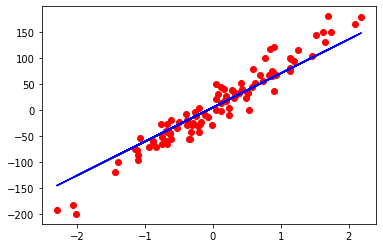

In [75]:
#0)prepare our data
# generate regression dataset
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)
# convert to torch tensor
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
# let's reshape our y , this have one row we want to make it column vector
# this view is built in help to reshape our tensor
y = y.view(y.shape[0], 1)

n_samples, n_features = X.shape

#1)model
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)



#2) loss and optimizer
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
#3) training loop
num_epochs = 100
for epoch in range(num_epochs):
  #forward pass and loss
  y_predicted = model(X)
  loss = criterion(y_predicted, y)
  #backward pass
  loss.backward()
  #update
  optimizer.step()
  # empty our gradient to zero
  optimizer.zero_grad()

  if(epoch+1) % 10 ==0:
    print(f'epoch: {epoch+1}, loss={loss.item():.4f}')

#plot
predicted = model(X).detach().numpy()
plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()

#Logistic Regression